<a href="https://colab.research.google.com/github/Fernando-Guerrero-Diaz/ADA-Informes/blob/main/CorteVarillas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de Corte de Varillas

**Entrada:** largo $n$ de una varilla, vector de precios $p$ por cada medida $i$ de la varilla 

**Salida**: Ganancias máximas posibles $r_n$ luego de cortar la varilla y vender sus partes

El corte de varillas es un problema de optimización, en el cual buscamos maximizar el retorno obtenido al cortar una varilla de largo variable. Ya que al cortar la varilla se crean varillas mas cortas, maximizar la ganancia obtenida por estas varillas es un problema de cierto modo redundante. Como se verá en el siguiente informe, aplicar programación dinamica para resolver este problema nos permitirá ahorrar memoria y resolver el problema más rapido que con una implementación netamente recursiva.

#2. RecursiveCut

A continuación se presenta la solución recursiva para el corte de varillas.

##2.1 Código

In [21]:
def RecursiveCut(n,p,verbose=False, indent = ""):
  global recursions
  cuts = []
  if verbose: print(indent,"Cortando una varilla de largo n:",n)
  if verbose: print(indent,"Recursiones:",recursions)
  if n<=0:
      if verbose: print(indent,"Caso base, retornando 0")
      return 0,cuts
  max = 0
  for i in range(1,n+1):
    if verbose: print(indent,"maximo actual:", max)
    if verbose: print(indent,"tmp = p[", i, "] + RecursiveCut(", n-i ,",p)")
    recursions+=1
    Rmax,Rcuts = RecursiveCut(n-i,p,verbose,(indent + "  "))
    tmp = p[i] + Rmax
    if (tmp>max):
       max = tmp
       cuts= [i] + Rcuts
       if verbose: print(indent,"Nuevo maximo.")
  if verbose: print(indent,"retornando maximo:", max, "cortes:", cuts)
  return max,cuts

p = [0,1,5,8,9,10,17,17,20,24,30]
recursions = 0
n =9
r,c = RecursiveCut(n,p)
print("Maximo retorno posible de varilla de largo", n, ":",r)
print("Llamadas recursivas:", recursions)
print("cortes:", c)

Maximo retorno posible de varilla de largo 9 : 25
Llamadas recursivas: 511
cortes: [3, 6]


##2.2 Descripción del Algoritmo

El algoritmo **RecursiveCut** recibe como entrada el largo de varilla `n` y el vector de precios `p`.

1. Se define una variable `max` con valor ínfimo, un vector `cuts` vacío para almacenar los largos de las varillas cortadas, y la variable global `recursions` para contar el número de recursones.
2. Si `n =< 0` se retorna `0` y `cuts` vacío.
2. Se entra en un for loop que itera con un `i` desde `1` hasta `n`. 
Usando el vector de precios, se calcula un máximo temporal `tmp` y se le asigna como valor la suma de `p[i]` mas el primer retorno `Rmax` de una llamada recursiva de **RecursiveCut**, dandole como entrada un largo `n-i`. Si este `tmp` es mayor a `max`, a `max` se le asigna el valor de `tmp`, y designamos a `cuts` igual a `[i] + Rcuts`, donde `Rcuts` es el arreglo de cortes que retornó la anterior llamada de **RecursiveCut**
3. Una vez finalizado el loop, se retorna el valor de `max`

##2.3 Ejemplo

Digamos que queremos cortar una varilla de largo $3$, y el vector de precios es el siguiente: $[1,5,8]$

1. Definimos el $max$ y le damos valor $0$.
2. Entramos a la primera iteración del for loop, con $i=1$. Para calcular el valor temporal $tmp$ sumamos $p[1]$ con el retorno de una llamada recursiva de **RecursiveCut** con largo $2$.

  2.1. En esta primera llamada recursiva, definimos un $max =0$ y empezamos a iterar. En la primera iteración, para calcular el $tmp$, se suma $p[1]$ con el retorno de **RecursiveCut**($1,p$).

     2.1.1 En esta llamada recursiva, no se puede cortar más, por lo que se retorna el valor de una varilla de largo $1$, que vale $1$.

  2.2 $tmp$ vale $1+1 = 2$. Este será un nuevo $max$. 
  
  2.3 Se entra a la siguiente iteración, que obtiene un $tmp = p[2] + 0 = 5$. (**RecursiveCut**($0,p$) siempre retorna $0$. Este $5$ será el nuevo $max$ ya que es mayor a $2$. 

  2.4 Terminamos de iterar, asi que retornamos $max = 5$
3. El $tmp$ calculado es igual a $1+5=6$. Este será nuestro primer $max$.
4. Entra a la segunda iteración, con $i=2$. Calcula un $tmp$ igual a la suma de $p[2]$ con el retorno de **RecursiveCut**($1,p$).

  4.1  En esta llamada recursiva, no se puede cortar más, por lo que se retorna el valor de una varilla de largo $1$, que vale $1$.
5. El $tmp$ resultante es igual a $max$, por lo que no cambia.
6. En la tercera y última iteración, se calcula $tmp= p[3] + 0 = 8$. Este será el nuevo $max$.
7. Finalmente, despues de 5 llamadas recursivas, se retorna $8$.

##2.4 Ejecución paso a paso (`verbose = True`)

In [ ]:
p = [0,1,5,8,9,10,17,17,20,24,30]
recursions = 0
n = 3
r,c = RecursiveCut(n,p,True)
print("Maximo retorno:",r)

 Cortando una varilla de largo n: 3
 Recursiones: 0
 maximo actual: 0
 tmp = p[ 1 ] + RecursiveCut( 2 ,p)
   Cortando una varilla de largo n: 2
   Recursiones: 1
   maximo actual: 0
   tmp = p[ 1 ] + RecursiveCut( 1 ,p)
     Cortando una varilla de largo n: 1
     Recursiones: 2
     maximo actual: 0
     tmp = p[ 1 ] + RecursiveCut( 0 ,p)
       Cortando una varilla de largo n: 0
       Recursiones: 3
       Caso base, retornando 0
     Nuevo maximo.
     retornando maximo: 1 cortes: [1]
   Nuevo maximo.
   maximo actual: 2
   tmp = p[ 2 ] + RecursiveCut( 0 ,p)
     Cortando una varilla de largo n: 0
     Recursiones: 4
     Caso base, retornando 0
   Nuevo maximo.
   retornando maximo: 5 cortes: [2]
 Nuevo maximo.
 maximo actual: 6
 tmp = p[ 2 ] + RecursiveCut( 1 ,p)
   Cortando una varilla de largo n: 1
   Recursiones: 5
   maximo actual: 0
   tmp = p[ 1 ] + RecursiveCut( 0 ,p)
     Cortando una varilla de largo n: 0
     Recursiones: 6
     Caso base, retornando 0
   Nuevo maximo.


#3. BottomUpCut
A continuación, se presenta la solución del problema usando programación dinámica, con enfoque bottom-up

##3.1. Código

In [11]:
import random

def cutrod_instance_generator(N):
  A = [0]
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A


def BottomUpCut(n,p,verbose=False):
  r = {}
  if n<= 0: return 0,[]
  for i in range(0,n+1):
    if verbose: print(" Calculo bottom up de varilla largo:", i)
    r[i]=[0,[]]
    for j in range(1,i+1):
      tmp = p[j] + r[i-j][0]
      if verbose: print("  comparando ", r[i][0], "con ", p[j], "+", r[i-j][0])
      if tmp > r[i][0]:
        r[i][0]=tmp
        r[i][1]= [j] + r[i-j][1]
        if verbose: print(" nuevo maximo para varilla de largo", i, ":", r[i][0], ", cortes:", r[i][1])

  if verbose: print("Retorno maximo para varilla de largo", n, ":", r[n][0], ", cortes:", r[n][1])
  return r[n]

p = [0,1,5,8,9,10,17,17,20,24,30]
n = 7
r,c = BottomUpCut(n,p)
print("Maximo retorno:",r)
print(c)

Maximo retorno: 18
[1, 6]


##3.2. Descripción del algoritmo

El algoritmo **BottomUpCut** recibe como entrada el largo de varilla `n` y el vector de precios `p`.

1. Se define una diccionario `r` en el cual se le asignará a cada longitud de varilla un retorno máximo y un arreglo con los largos de cortes requeridos. Inicializamos el `r[0]`, dándole máximo `0` y arreglo de cortes vacio.
2. Si `n =< 0` se retorna `0` y arreglo de cortes vacío.
2. Se entra en un for loop que itera con un `i` desde `1` hasta `n` inclusive. Inicializamos el `r[i]` con máximo `0` y cortes vacío. Luego entramos a otro loop, iterando con un `j` que va de `1` hasta `i`. Usando el vector de precios, se calcula un máximo temporal `tmp` y se le asigna como valor la suma de `p[j]` mas el máximo que se encuentre en `r[i-j][0]`.
 Si este `tmp` es mayor a `r[i][0]` , a `r[i][0]` se le asigna el valor de `tmp`, y designamos a `r[i][1]` igual a `[j] + r[i-j][1]`. Una vez termina este loop, se tiene el máximo para varilla de largo `i`, y esto continúa hasta que `i==n`.
3. Una vez finalizado el loop, se retorna `r[n]`.

##3.3. Ejemplo

A modo de ejemplo, calcularemos el mismo retorno de una varilla con largo $3$ usando el mismo vector de precios $P=[1,5,8]$

1. Se inicializa el diccionario $r$ y declaramos $r[0] = 0$.
2. Calculamos $r[1]$. Lógicamente, solo puede ser igual a $P[1]= 1$.
3. Calculamos $r[2]$. Se itera desde $1$ a $2$, calculando el máximo entre $P[2]$ y $P[1] + r[1]$. $P[2] = 5 > 1+1$, por lo que este es el máximo que guarda $r[2]$.
4. Calculamos $r[3]$. Se busca el máximo entre $P[3] = 8$, $P[2] + r[1] = 6$ y $P[1] + r[2] = 6$.
5. Finalmente retornamos $r[3] = 8$.


##3.4 Ejecución paso a paso (`verbose = True`)

In [19]:
p = cutrod_instance_generator(10)
print ("Vector de precios aleatorio:", p)
n = 7
r,c = BottomUpCut(n,p,True)
print("Maximo retorno:",r)
print("cortes",c)

Vector de precios aleatorio: [0, 2, 10, 18, 24, 25, 29, 35, 37, 42, 43]
 Calculo bottom up de varilla largo: 0
 Calculo bottom up de varilla largo: 1
  comparando  0 con  2 + 0
 nuevo maximo para varilla de largo 1 : 2 , cortes: [1]
 Calculo bottom up de varilla largo: 2
  comparando  0 con  2 + 2
 nuevo maximo para varilla de largo 2 : 4 , cortes: [1, 1]
  comparando  4 con  10 + 0
 nuevo maximo para varilla de largo 2 : 10 , cortes: [2]
 Calculo bottom up de varilla largo: 3
  comparando  0 con  2 + 10
 nuevo maximo para varilla de largo 3 : 12 , cortes: [1, 2]
  comparando  12 con  10 + 2
  comparando  12 con  18 + 0
 nuevo maximo para varilla de largo 3 : 18 , cortes: [3]
 Calculo bottom up de varilla largo: 4
  comparando  0 con  2 + 18
 nuevo maximo para varilla de largo 4 : 20 , cortes: [1, 3]
  comparando  20 con  10 + 10
  comparando  20 con  18 + 2
  comparando  20 con  24 + 0
 nuevo maximo para varilla de largo 4 : 24 , cortes: [4]
 Calculo bottom up de varilla largo: 5
  co

#4. Correctitud

**Teorema:**  *El algoritmo **BottomUpCut** retorna la ganancia máxima posible al cortar una varilla de largo n, usando un vector de precios para cada longitud de varilla.* 

Usando inducción, podemos probar que el algoritmo **BottomUpCut** es correcto. Designando al problema como $P(n)$, debemos probar que:

1. $P(1)$ Es correcto. Lógicamente, cuando la ongitud es $1$, Lo único que ppuede retornar como máximo es $p[1]$, y efectivamente eso es lo que hace el código, por lo que es correcto.

2. Si $P(m)$ Es correcto para $m < n $, entonces probar $P(n)$. En el código, en la última iteración, se busca el máximo calculando la suma de $p[j] + r[n-j]$, con $j<n$. Si consideramos $m=n-j$, entonces estos son máximos correctos, por lo que el máximo para n será correcto también.

Por lo tanto, el algoritmo es correcto.

#5. Complejidad

##5.1 Número de operaciones / Tiempo de ejecución
Considerando sólamente el algorítmo **BottomUpCut**, podemos decir que para resolver el problema de corte de varillas de tamaño $N$, hay que resolver $N$ subproblemas, correspondientes a calcular los máximos para cada largo $i$ menor a $N$. Para calcular estos máximos, el algoritmo recorre desde $1$ hasa $i$, realizando una suma y comparación. Por lo tanto, el número de operaciones requeridas para un problema de tamaño $N$ es el siguiente:

$X(N) = \sum_{i=1}^N \sum_{j=1}^i 2 =\sum_{i=1}^N 2i = N(N+1)$

Por lo tanto, podemos aseverar que **BottomUpCut** tendrá una cota temporal asintótica de $O(N)$

##5.2 Complejidad espacial

En **BottomUpCut**, el algoritmo maneja un diccionario en el cual almacena los máximos que calcula para longitudes menores. Una vez terminada la ejecución, el diccionario tendrá solamente N elementos, por lo que podemos decir que la complejidad espacial es de orden N.


#6. Experimentos

##6.1 RecursiveCut vs BottomUpCut

A continuación se graficará el tiempo de ejecución que requiere la implementación recursiva en contraste con la implementación usando programación dinámica.

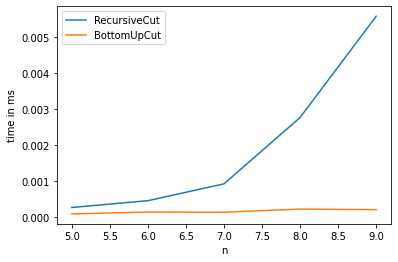

In [22]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat



x=[] 
y1=[]
y2=[]

recursions = 0

for n in range(5,10):
  p = cutrod_instance_generator(n)
  t1 = repeat(setup="from __main__ import RecursiveCut", stmt=f"RecursiveCut({n},{p})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import BottomUpCut", stmt=f"BottomUpCut({n},{p})", repeat=1, number=10)
  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["RecursiveCut", "BottomUpCut"])


plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Claramente, el tiempo de **BottomUpCut** es mucho más llevadero, considerando lo rápido que crece la alternativa recursiva en comparación, ya que este tiene un crecimiento en orden de $a^n$, mucho más grande que $n^2$.